# Customer Credit Risk Features

## 1) Problem Statement
- Financial institutions incur significant losses due to the default of vehicle loans, leading to stricter underwriting and higher rejection rates.
- This necessitates the development of a more accurate credit risk scoring model.

### 1.1 Project Objective
Build a predictive model to accurately predict the probability of a borrower defaulting on a vehicle loan in their first Equated Monthly Installment (EMI) on the due date, thereby classifying them into good and bad borrowers. Available data to be leveraged includes:

- **Loanee Information:** Demographic data like age, identity proof, etc.
- **Loan Information:** Disbursal details, loan-to-value (LTV) ratio, etc.
- **Bureau Data & History:** Bureau score, number of active accounts, the status of other loans, credit history, etc.

### 1.2 Potential Impact
- **Reduce financial losses** by identifying and mitigating high-risk loans.
- **Improve loan approval rates** for creditworthy individuals who might otherwise be rejected under current stringent policies
- **Identify key determinants of default**, which can then be used to refine lending policies and minimize future default rates.


## 2) Data Collection
- Data Dictionary - "data_dictionary.csv
- Dataset - "train.csv"

### 2.1 Import Pandas, Numpy, Seaborn, Matplotlib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### 2.2 Import the CSV file as Pandas DataFrame

In [2]:
df = pd.read_csv('data/train.csv')

#### Show top 5 records

In [3]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


#### Shape of the dataset

In [4]:
df.shape

(233154, 41)

## 3) Data checks
- check data types
- check missing values
- check duplicate records
- check unique values in each col
- check dataset statistics
- check categories
- data conversion _(if any)_
- feature engineering _(based on initial analysis)_

### 3.1 Check data types

In [5]:
# Check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

#### Insights
- Dtype for columns with temporal values (i.e., `Date.of.Birth`, `DisbursalDate`, `AVERAGE.ACCT.AGE`, `CREDIT.HISTORY.LENGTH`) is `object`-- need to convert to `datetime64` or `int64`.
- Dtype for `loan_default` is `int64`-- need to convert to `str` for target labels.
- Dtype for `manufacturer_id` is int64 -- should convert to `str` for categorical feature.

### 3.2 Check missing values

In [6]:
df.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

#### Insights
- There are 7661 missing values in the `Employment.Type` column, ~3% of dataset
- Assumption: These customers are unemployed
- Impute to "Unemployed"

In [7]:
# Convert NaN values in the `Employment.Type` column to "Unemployed"
df['Employment.Type'] = df['Employment.Type'].fillna('Unemployed')

# Verify
print(df['Employment.Type'].value_counts(dropna=False))

Employment.Type
Self employed    127635
Salaried          97858
Unemployed         7661
Name: count, dtype: int64


### 3.3 Check duplicate records

In [8]:
df.duplicated().sum()

np.int64(0)

There are no duplicate records in the dataset

### 3.4 Check unique values in each col

In [9]:
df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             3
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

### 3.5 Check dataset statistics

In [10]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


#### Insights
- `disbursed_amount` -- mean is very close to the median value; 50% of the values are within 15% of the mean, suggesting a pretty normal distribution with a few extreme outliers.
- `asset_cost` -- wide range from 37,000 to 1,628,992 with mean of 75,865 and the 75% below 79,201, suggesting a right-skewed distribution.
- `ltv` -- wide range from 10.03 to 95.00 with mean of 74.75, suggesting a left-skewed distribution.

### 3.6 Check categories

In [11]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [12]:
print("Categories in 'Employment.Type':\n", df['Employment.Type'].unique())
print("\nCategories in 'PERFORM_CNS.SCORE.DESCRIPTION':\n", df['PERFORM_CNS.SCORE.DESCRIPTION'].unique())

Categories in 'Employment.Type':
 ['Salaried' 'Self employed' 'Unemployed']

Categories in 'PERFORM_CNS.SCORE.DESCRIPTION':
 ['No Bureau History Available' 'I-Medium Risk' 'L-Very High Risk'
 'A-Very Low Risk' 'Not Scored: Not Enough Info available on the customer'
 'D-Very Low Risk' 'M-Very High Risk' 'B-Very Low Risk' 'C-Very Low Risk'
 'E-Low Risk' 'H-Medium Risk' 'F-Low Risk' 'K-High Risk'
 'Not Scored: No Activity seen on the customer (Inactive)'
 'Not Scored: Sufficient History Not Available'
 'Not Scored: No Updates available in last 36 months' 'G-Low Risk'
 'J-High Risk' 'Not Scored: Only a Guarantor'
 'Not Scored: More than 50 active Accounts found']


### 3.7 Data conversion

In [13]:
def convert_date(date_str):
    '''
    Convert dd-mm-yy to dd-mm-yyyy with custom century logic
    '''
    try:
        day, month, year = date_str.split('-')
        year_int = int(year)

        # Apply century logic
        if 0 <= year_int <= 25:
            full_year = '20' + year
        else:
            full_year = '19' + year

        return f"{day}-{month}-{full_year}"
    except ValueError:
        return date_str

# Apply the transformation
df['Date.of.Birth'] = df['Date.of.Birth'].apply(convert_date)
df['DisbursalDate'] = df['DisbursalDate'].apply(convert_date)

# Convert to datetime
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'], format='%d-%m-%Y')
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], format='%d-%m-%Y')

In [14]:
import re

def convert_to_months(time_str):
    '''
    Convert Xyrs Ymon to number of months
    '''
    if pd.isna(time_str):
        return None
    
    # Extract years and months
    match = re.match(r'(\d+)\s*yrs\s*(\d+)\s*mons?', time_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years * 12 + months
    
# Apply the transformation
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(convert_to_months)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(convert_to_months)

In [15]:
# Verify
print(df[['Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']].head())

  Date.of.Birth DisbursalDate  AVERAGE.ACCT.AGE  CREDIT.HISTORY.LENGTH
0    1984-01-01    2018-08-03                 0                      0
1    1985-07-31    2018-09-26                23                     23
2    1985-08-24    2018-08-01                 0                      0
3    1993-12-30    2018-10-26                 8                     15
4    1977-12-09    2018-09-26                 0                      0


In [16]:
# Add `default_label` column for visualization
df['default_label'] = df['loan_default'].map({1: 'default', 0: 'non-default'})

# Convert `manufacturer_id` to `str`
df['manufacturer_id'] = df['manufacturer_id'].astype(str)

# Verify
print("Data Type: ", df['loan_default'].dtype)
print("Value Counts: \n", df['loan_default'].value_counts())

print("\n\nData Type: ", df['manufacturer_id'].dtype)
print("Value Counts: \n", df['manufacturer_id'].value_counts())

Data Type:  int64
Value Counts: 
 loan_default
0    182543
1     50611
Name: count, dtype: int64


Data Type:  object
Value Counts: 
 manufacturer_id
86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: count, dtype: int64


### 3.8 Add columns for "Age" and "Default Ratio"

In [17]:
# Calculate age at the time of loan disbursement
df['age'] = df['DisbursalDate'].dt.year - df['Date.of.Birth'].dt.year

In [18]:

# Add new column == `PRI.DEFAULT.RATIO`
def calculate_ratio(df, numerator_col, denominator_col, new_col_name):
    """
    Calculate ratio between two columns, handling division by zero cases.
    
    Args:
        df: pandas DataFrame
        numerator_col: Column name to use as numerator
        denominator_col: Column name to use as denominator
        new_col_name: Name for the new column to be created
        
    Returns:
        The original dataframe with the new ratio column added
    """
    df[new_col_name] = np.where(
        df[denominator_col] > 0,
        df[numerator_col] / df[denominator_col],  # Normal ratio
        df[numerator_col]  # When denominator is zero, ratio = numerator value
    )
    return df

# Calculate primary default ratio
df = calculate_ratio(df, 'PRI.OVERDUE.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.DEFAULT.RATIO')

# Verify
print(df['PRI.DEFAULT.RATIO'].max())
print(df['PRI.DEFAULT.RATIO'].isna().any())


df.head()

12.0
False


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,default_label,age,PRI.DEFAULT.RATIO
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,non-default,34,0.0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,default,33,1.0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,non-default,33,0.0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,default,25,0.0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,default,41,0.0


## 4) Data Visualization

### 4.1 Loan Information
**Univariate & Bivariate Analysis**

#### 4.1.1 Visualize distribution of `default_label`
- Countplot
- Breakdown by `Employment.Type`

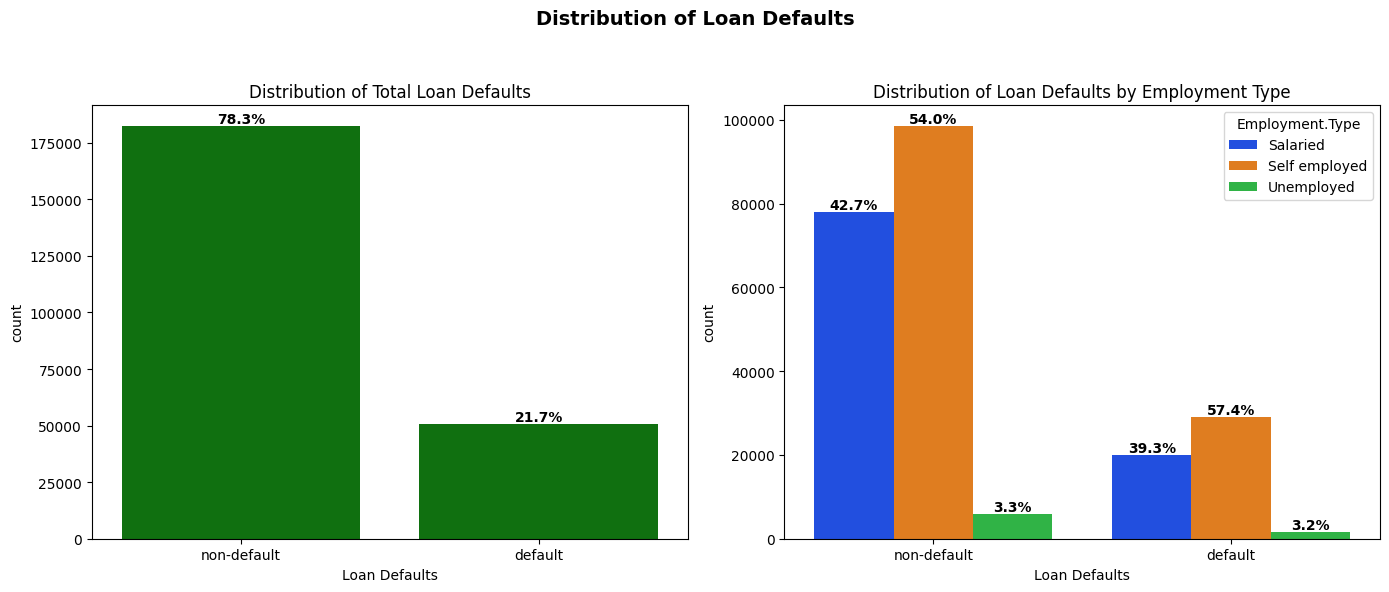

In [19]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Loan Defaults', fontsize=14, fontweight='bold')

# Histogram for total default_label
sns.countplot(x=df['default_label'], color='g', ax=axs[0])
axs[0].set_title('Distribution of Total Loan Defaults')
axs[0].set_xlabel('Loan Defaults')

# Histogram for default_label by Employment.Type
sns.countplot(x=df['default_label'], hue=df['Employment.Type'], palette='bright', ax=axs[1])
axs[1].set_title('Distribution of Loan Defaults by Employment Type')
axs[1].set_xlabel('Loan Defaults')

# Calculate percentage of each default_label category in the left plot
for p in axs[0].patches:
    height = p.get_height()
    total = len(df)
    if height > 0:
        percentage = f'{100 * height / total:.1f}%'
        axs[0].annotate(
            percentage,
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=10,
            color='black',
            weight='bold'
        )

# Calculate percentage of each employment type in each default_label category in the right plot
crosstab = pd.crosstab(df['Employment.Type'], df['default_label'], margins=True)
total_non_default = crosstab['non-default'].iloc[3]
total_default = crosstab['default'].iloc[3]

for p in axs[1].patches:
    height = p.get_height()
    total = total_default if p.get_x() > 0.5 else total_non_default
    if height > 0:
        percentage = f'{100 * height / total:.1f}%'
        axs[1].annotate(
            percentage,
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=10,
            color='black',
            weight='bold'
        )

plt.tight_layout()
plt.subplots_adjust(top=0.82)
plt.show()

#### Insights
- Imbalanced dataset with majority of loans labelled as "non-default" while a much smaller proportion labelled as "default".
- No significant difference in the percentage of "Unemployed" customers that defaulted in their first EMI when compared to those that did not default.
- The percentage of "Unemployed" customers in both loan default categories (default - 3.2%, non-default - 3.3%) is also consistent with the overall percentage of "Unemployed" customers in the sample (~3%), suggesting loan defaults happen across the entire spectrum of loan customers.

#### 4.1.2 Visualize average distribution of `disbursed_amount`, `asset_cost`, and `ltv`
- Histogram
- Boxplot
- KDE

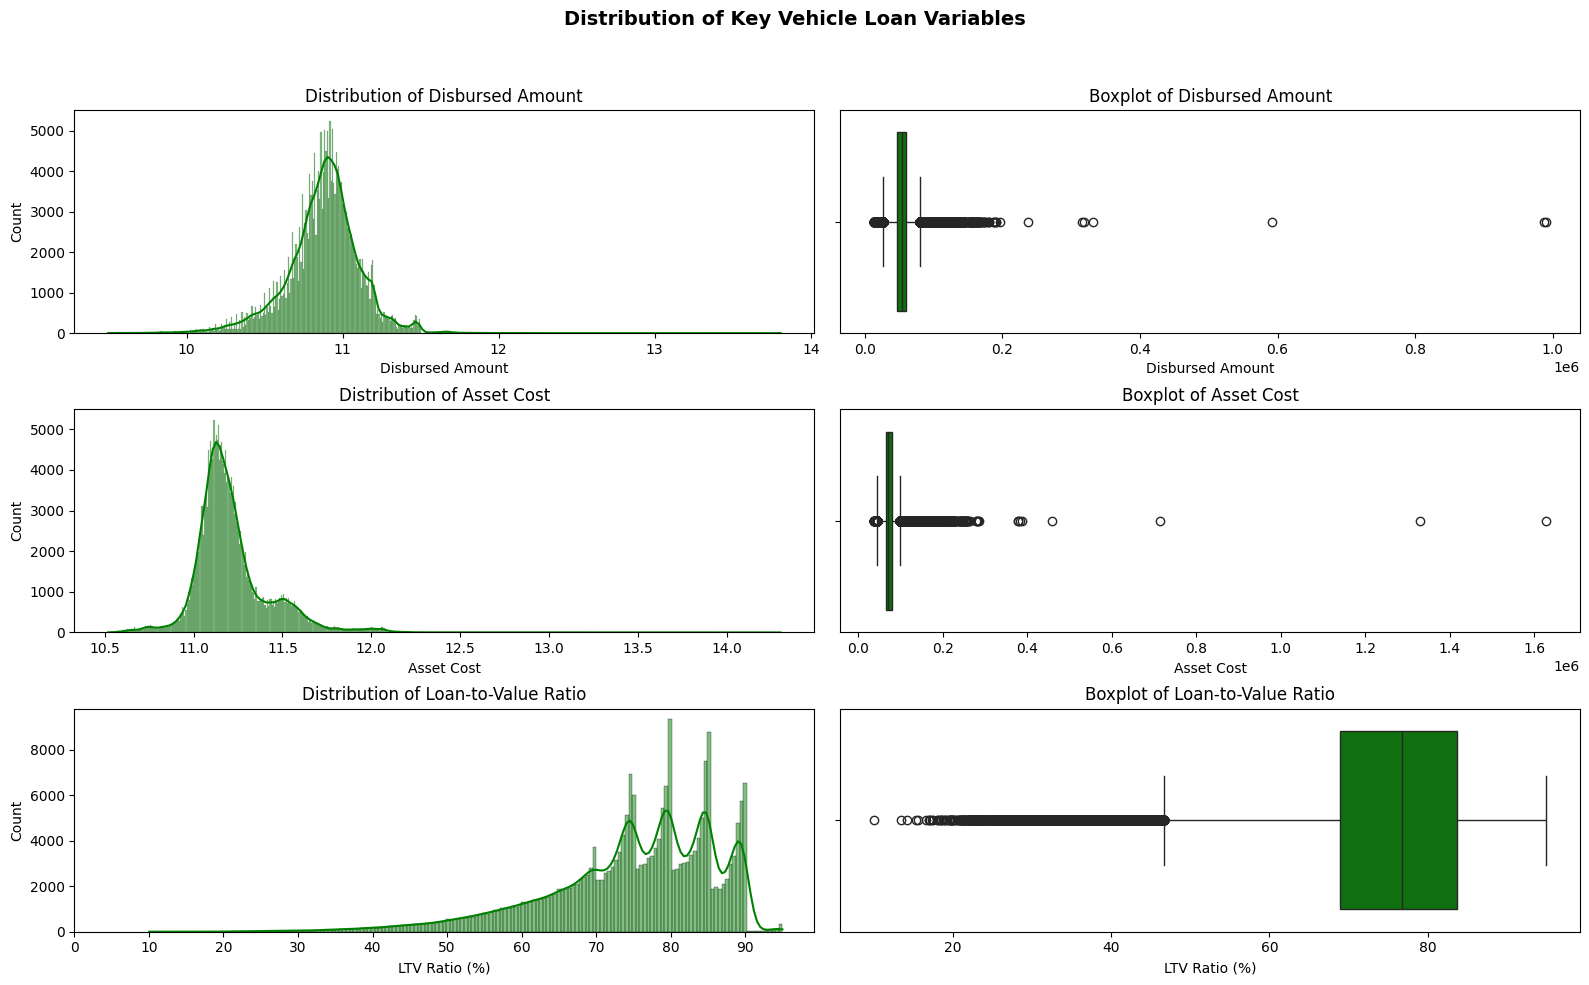

In [20]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 2, figsize=(16, 10))
fig.suptitle('Distribution of Key Vehicle Loan Variables', fontsize=14, fontweight='bold')

# Histogram and boxplot for disbursed_amount (log-transformed)
sns.histplot(x=np.log(df['disbursed_amount']), kde=True, color='g', ax=axs[0,0])
axs[0,0].set_title('Distribution of Disbursed Amount')
axs[0,0].set_xlabel('Disbursed Amount')
sns.boxplot(x=df['disbursed_amount'], color='g', ax=axs[0,1])
axs[0,1].set_title('Boxplot of Disbursed Amount')
axs[0,1].set_xlabel('Disbursed Amount')

# Histogram and boxplot for asset_cost (log-transformed)
sns.histplot(x=np.log(df['asset_cost']), kde=True, color='g', ax=axs[1,0])
axs[1,0].set_title('Distribution of Asset Cost')
axs[1,0].set_xlabel('Asset Cost')
sns.boxplot(x=df['asset_cost'], color='g', ax=axs[1,1])
axs[1,1].set_title('Boxplot of Asset Cost')
axs[1,1].set_xlabel('Asset Cost')

# Histogram and boxplot for ltv
sns.histplot(x=df['ltv'], kde=True, color='g', ax=axs[2,0])
axs[2,0].set_title('Distribution of Loan-to-Value Ratio')
axs[2,0].set_xlabel('LTV Ratio (%)')
axs[2,0].set_xticks(np.arange(0, 100, 10))
sns.boxplot(x=df['ltv'], color='g', ax=axs[2,1])
axs[2,1].set_title('Boxplot of Loan-to-Value Ratio')
axs[2,1].set_xlabel('LTV Ratio (%)')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

#### Insights
- Distribution for `disbursed_amount` and `asset_cost` are right-skewed, but primarily due to some outliers.
- But narrow IQR in the boxplot suggests skewness is due to some outliers for both features.
- Most loan amounts are close to the mean and most assets (vehicles) are similarly priced.
- Left-skewed multimodal (5 peaks) distribution for the `ltv` ratio suggests multiple borrower segments, potentially with different risk profiles and informed by policy thresholds.
    - 70% peak has a larger range suggests a more flexible "catch-all" policy for customers in highest risk segment that still qualify for a loan.
    - 75%, 80%, 85%, 90% peaks suggests standard `ltv` thresholds for the majority of the customers -- **potentially group into different bins for mean encoding using target variable to better represent this feature and the target variable.**
    - While not indicative of a peak, the 95% `ltv` range suggests a policy that accepts higher risked LTV ratios.

### 4.2 Bureau & Credit History
**Univariate & Bivariate Analysis**

#### 4.2.1 Visualize average distribution of `PERFORM_CNS.SCORE` and `PERFORM_CNS.SCORE.DESCRIPTION`
- Histogram
- Breakdown by Credit Score Risk Profiles

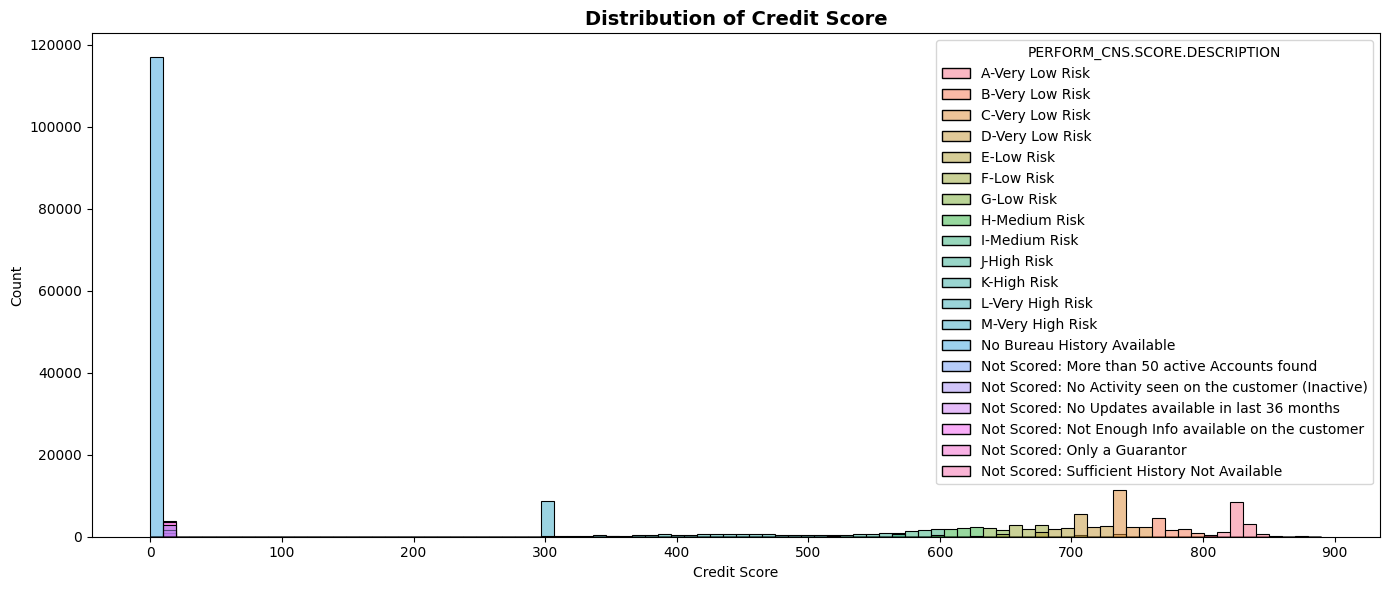

In [21]:
# Sort the categories in PERFORM_CNS.SCORE.DESCRIPTION
sorted_order = sorted(df['PERFORM_CNS.SCORE.DESCRIPTION'].unique())

# Histogram for credit score (i.e., PERFORM_CNS.SCORE)
plt.figure(figsize=(14, 6))
sns.histplot(x=df['PERFORM_CNS.SCORE'], bins=90, hue=df['PERFORM_CNS.SCORE.DESCRIPTION'], hue_order=sorted_order)
plt.title('Distribution of Credit Score', fontsize=14, fontweight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(np.arange(0, 1000, 100))

plt.tight_layout()
plt.show()

#### Insights
- Majority of the customers do not have credit history.
- A small group of customers do not have enough bureau information and have credit score < 20:
    - Inactive customers
    - No recent updates
    - Not enough info
    - Insufficient historical info
- Imbalanced dataset in the credit score variable potentially reduces its impact as a feature in the predictive model.
- **Potentially combine customers with credit score < 20 into a single category.**
- Due to the high cardinality of `PERFORM_CNS.SCORE.DESCRIPTION`, **potentially apply mean/target encoding using target variables to better represent the correlation between this feature and the target variable and reduce bias.**


#### 4.2.2 Visualize distribution of the availability of the different ID features
- Histogram -- `MobileNo_Avl_Flag`, `Aadhar_flag`, `PAN_flag`
- Breakdown by `default_label`

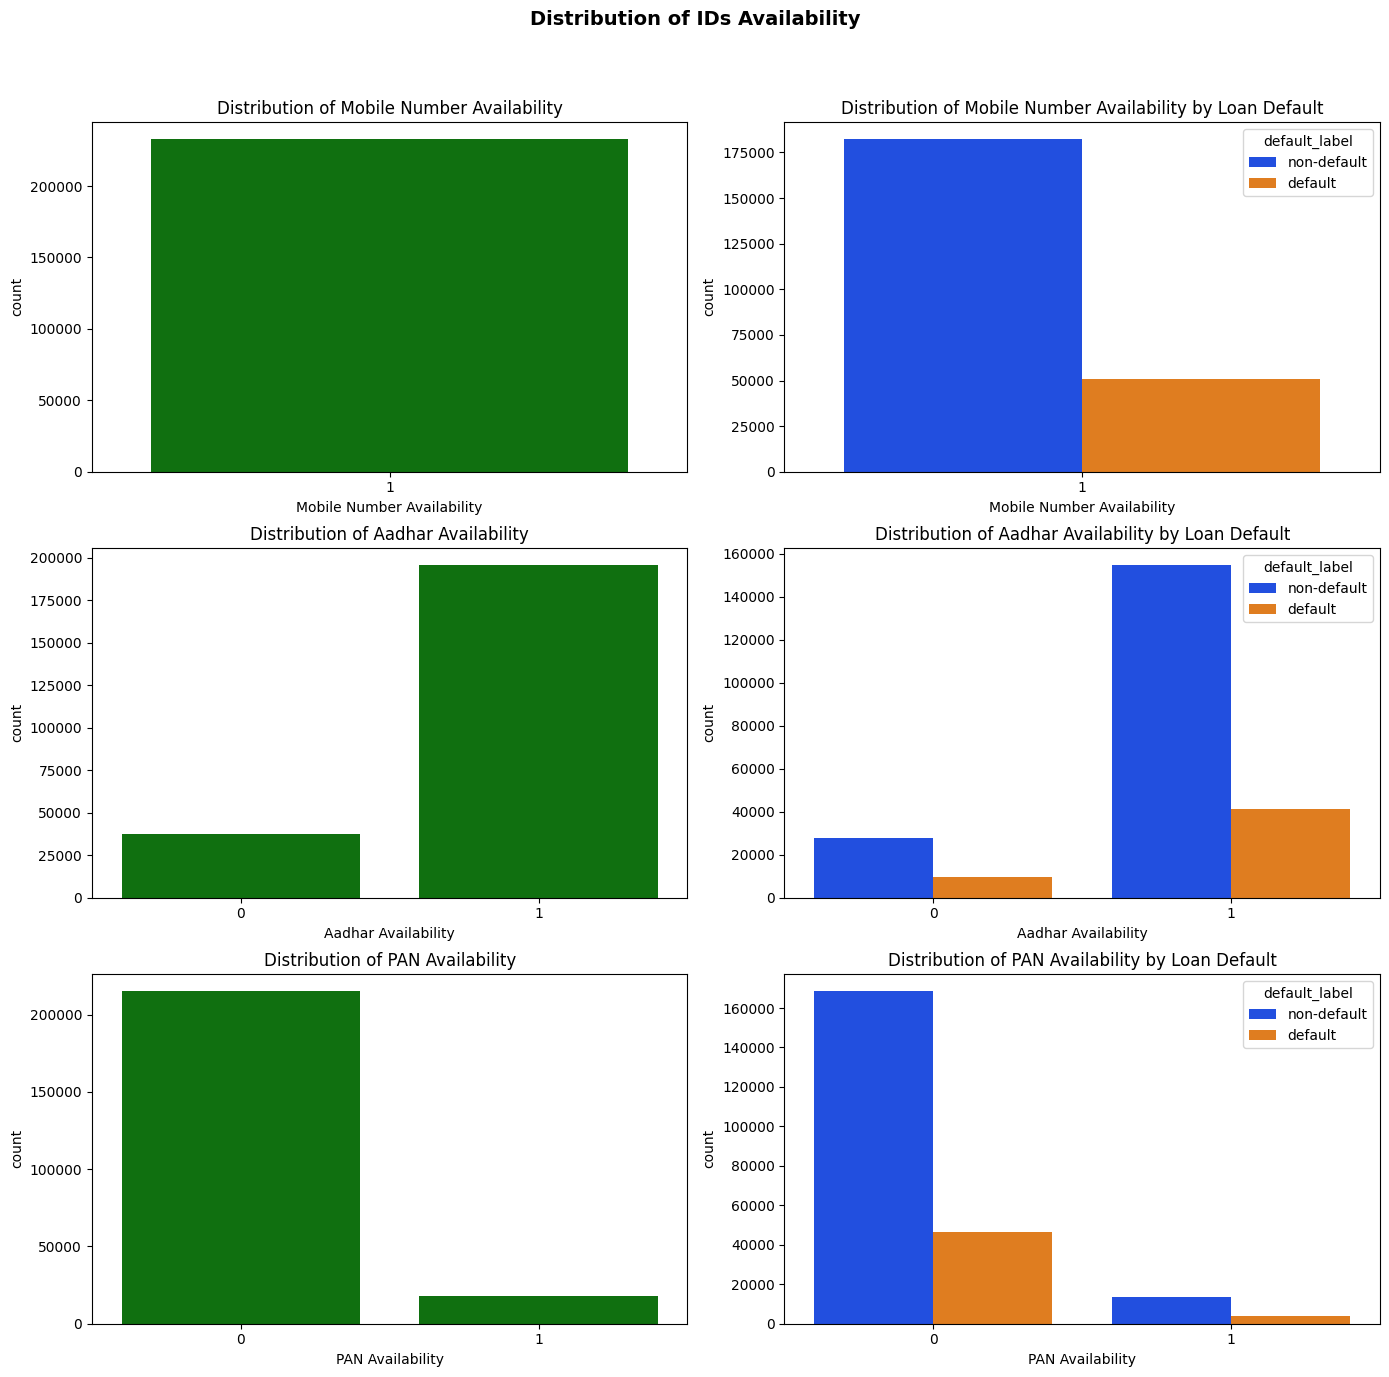

In [22]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 14))
fig.suptitle('Distribution of IDs Availability', fontsize=14, fontweight='bold')

# Histogram for total MobileNo_Avl_Flag
sns.countplot(x=df['MobileNo_Avl_Flag'], color='g', ax=axs[0,0])
axs[0,0].set_title('Distribution of Mobile Number Availability')
axs[0,0].set_xlabel('Mobile Number Availability')

# Histogram for MobileNo_Avl_Flag by default_label
sns.countplot(x=df['MobileNo_Avl_Flag'], hue=df['default_label'], palette='bright', ax=axs[0,1])
axs[0,1].set_title('Distribution of Mobile Number Availability by Loan Default')
axs[0,1].set_xlabel('Mobile Number Availability')

# Histogram for total Aadhar_flag
sns.countplot(x=df['Aadhar_flag'], color='g', ax=axs[1,0])
axs[1,0].set_title('Distribution of Aadhar Availability')
axs[1,0].set_xlabel('Aadhar Availability')

# Histogram for Aadhar_flag by default_label
sns.countplot(x=df['Aadhar_flag'], hue=df['default_label'], palette='bright', ax=axs[1,1])
axs[1,1].set_title('Distribution of Aadhar Availability by Loan Default')
axs[1,1].set_xlabel('Aadhar Availability')

# Histogram for total PAN_flag
sns.countplot(x=df['PAN_flag'], color='g', ax=axs[2,0])
axs[2,0].set_title('Distribution of PAN Availability')
axs[2,0].set_xlabel('PAN Availability')

# Histogram for PAN_flag by default_label
sns.countplot(x=df['PAN_flag'], hue=df['default_label'], palette='bright', ax=axs[2,1])
axs[2,1].set_title('Distribution of PAN Availability by Loan Default')
axs[2,1].set_xlabel('PAN Availability')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

### 4.3 Customer Demographics
**Univariate & Bivariate Analysis**

#### 4.3.1 Visualize average distribution of `age`
- Histogram
- Breakdown by `Employment.Type` and `default_label`

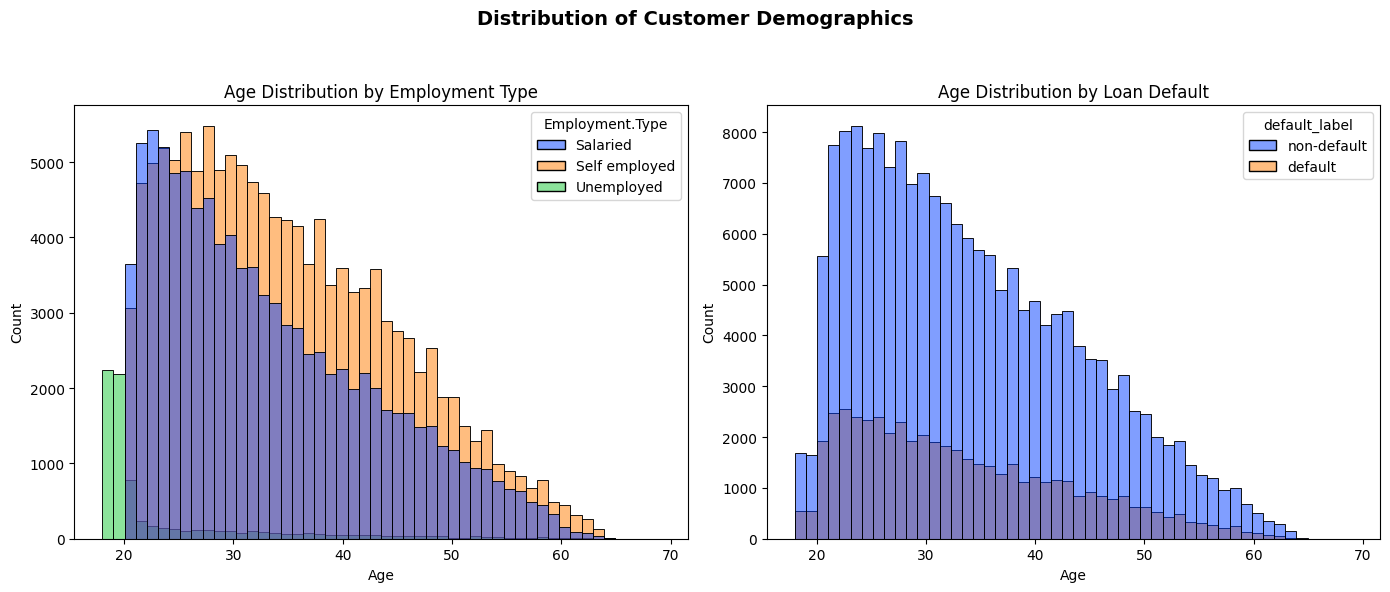

In [23]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Customer Demographics', fontsize=14, fontweight='bold')

# Histogram for age categorized by Employment.Type
sns.histplot(x=df['age'], bins=50, hue=df['Employment.Type'], palette='bright', ax=axs[0])
axs[0].set_title('Age Distribution by Employment Type')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')

# Histogram for age categorized by default_label
sns.histplot(x=df['age'], bins=50, hue=df['default_label'], palette='bright', ax=axs[1])
axs[1].set_title('Age Distribution by Loan Default')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(top=0.82)
plt.show()

#### Insights
- Self-employed forms the largest group of loan customers

### 4.4 Relationship between Numerical Features
##### Multivariate Analysis

#### 4.4.1 Visualize pairwise relationship between numerical features
- Pairplot

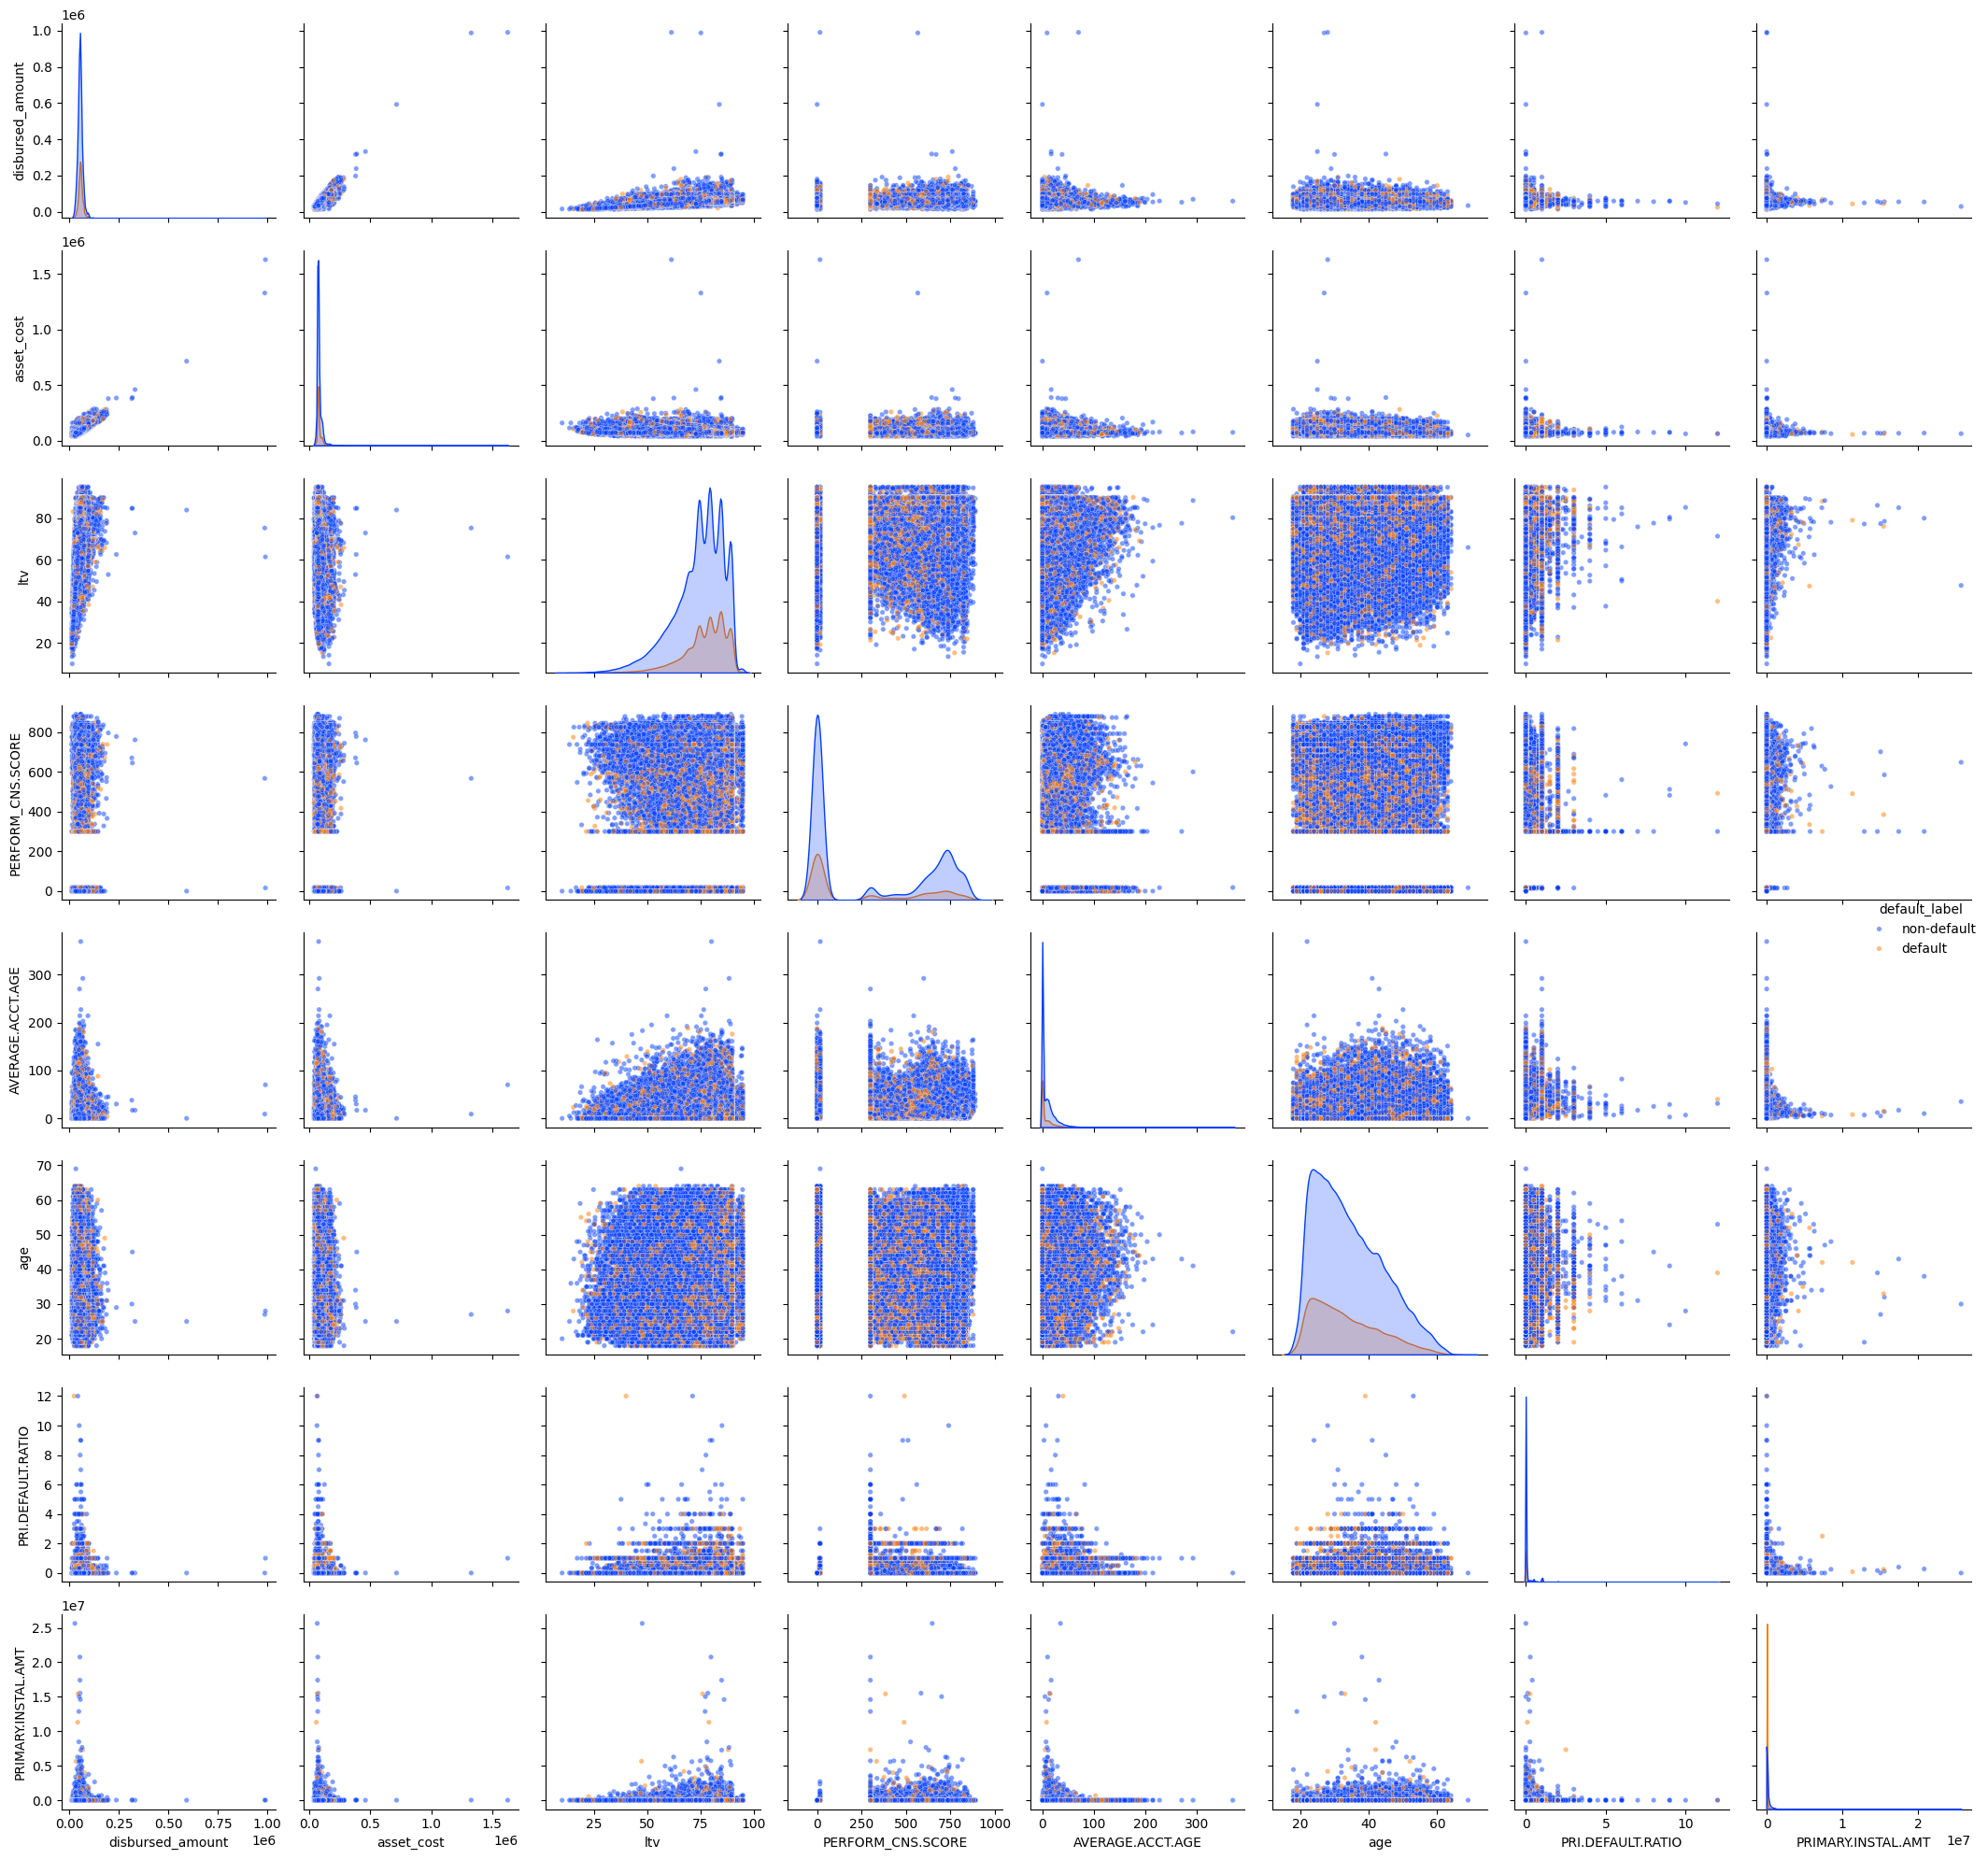

In [24]:
# List of numerical features
numerical_features = ['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE', 'AVERAGE.ACCT.AGE', 'age', 'PRI.DEFAULT.RATIO', 'PRIMARY.INSTAL.AMT']

# Pair plot
sns.pairplot(data=df, vars=numerical_features, hue='default_label', plot_kws={'alpha': 0.5, 's':15}, palette='bright')

plt.tight_layout()
plt.show()

#### Insights
- `disbursed_amount` and `asset_cost` has very strong positive linear correlation; **potentially drop either feature to reduce dimensionality** _(no reason to combine since `ltv` already exists)_.
- No clear linear correlation between `disbursed_amount` and `ltv` ratio although density is higher in the 70 - 90% range, consistent with the presumed standard ltv ratio threshold.
- Almost all outliers in terms of `disbursed_amount` are non-defaulters, suggesting the usefulness of these outlying data points as good predictors.

#### 4.4.2 Visualize Relationship between Loan Information and Credit History
- Scatterplot
- Analyze the relationship between these features:
    - `disbursed_amount`
    - `ltv`
    - `default_label`
    - `PERFORM_CNS.SCORE`

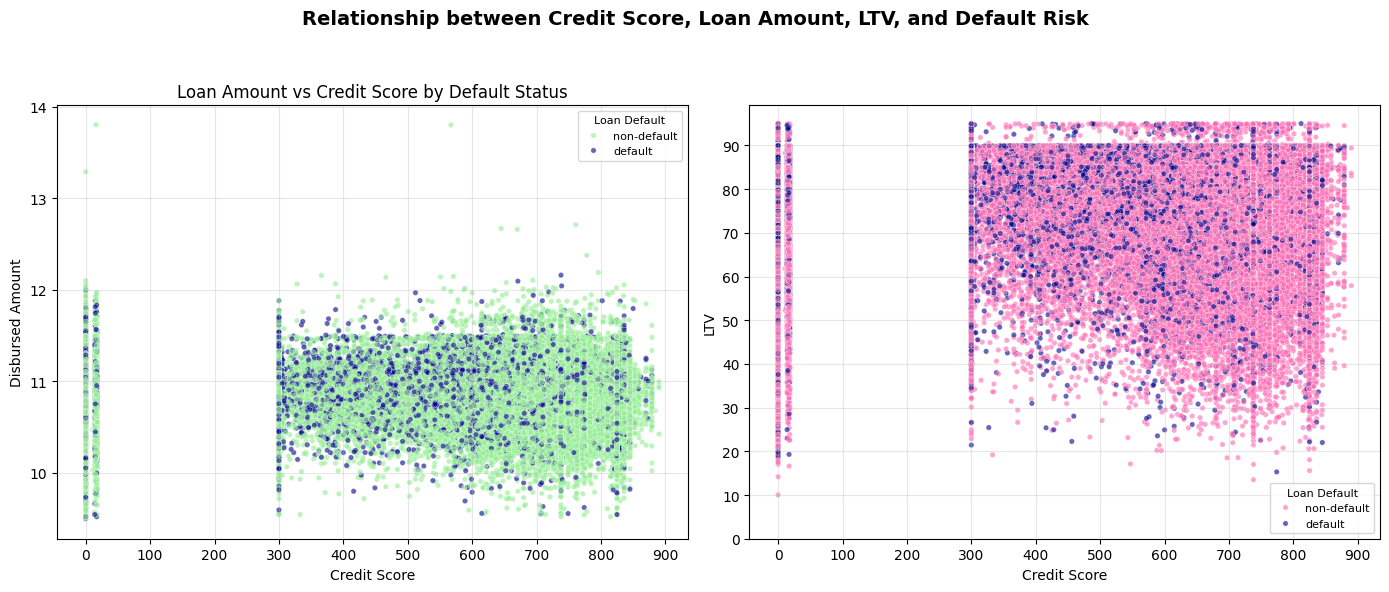

In [25]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Relationship between Credit Score, Loan Amount, LTV, and Default Risk', fontsize=14, fontweight='bold')

# Scatterplot for default_label vs disbursed_amount
sns.scatterplot(
    x=df['PERFORM_CNS.SCORE'], 
    y=np.log(df['disbursed_amount']), 
    hue=df['default_label'],
    alpha=0.6,
    s=15,
    palette=['lightgreen', 'darkblue'],
    ax=axs[0]
)
axs[0].set_title('Loan Amount vs Credit Score by Default Status')
axs[0].set_xlabel('Credit Score')
axs[0].set_ylabel('Disbursed Amount')
axs[0].set_xticks(np.arange(0, 1000, 100))
axs[0].grid(True, alpha=0.3)
axs[0].legend(title='Loan Default', loc='upper right', title_fontsize=8, fontsize=8)

# Scatterplot for default_label vs ltv
sns.scatterplot(
    x=df['PERFORM_CNS.SCORE'],
    y=df['ltv'],
    hue=df['default_label'],
    alpha=0.6,
    s=15,
    palette=['hotpink', 'darkblue'],
    ax=axs[1]
)  
axs[1].set_xlabel('Credit Score')
axs[1].set_ylabel('LTV')
axs[1].set_xticks(np.arange(0, 1000, 100))
axs[1].set_yticks(np.arange(0, 100, 10))
axs[1].grid(True, alpha=0.3)
axs[1].legend(title='Loan Default', loc='lower right', title_fontsize=8, fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.82)
plt.show()

#### Insights
- Loans have been disbursed to customers with `PERFORM_CNS.SCORE == 0`, with a wide LTV ratio range from 10% - 95%
    - Although there seems to be a clear demarcation where LTV ratio doesn't usually go above 90%, presumably only in specific cases
- There is also a clear demarcation where no loan is given when `PERFORM_CNS.SCORE < 300` in both plots
- These two observations suggest a credit score threshold of 300 to be eligible for loan, while loan-eligible customers with 0 credit score are potentially:
    - new credit accounts
    - customers without traditional credit history
    - expected to fulfil other lending criteria

## 5) Feature Engineering
Based on the above visual analysis, perform the following engineering:
- Binning the `ltv` feature and apply mean encoding to better represent the correlation between `ltv` and the target variable
- Consolidate the categories in `PERFORM_CNS.SCORE.DESCRIPTION` into 6 categories -- "Very Low Risk", "Low Risk", "Medium Risk", "High Risk", "Very High Risk", and "Unscored" to reduce dimensions, and apply mean encoding to reduce bias and better represent the correlation between `PERFORM_CNS.SCORE.DESCRIPTION` and the target variable.
- Log transform the `disbursed_amount` to handle the outliers
- Create a new col == `credit_utilization` using `PRI.DISBURSED.AMOUNT` / `PRI.SANCTIONED.AMOUNT`

### 5.1 `ltv` Binning with Mean Encoding

In [26]:
# Copy the df for feature engineering
df_fe = df.copy()

In [27]:
def ltv_binning_with_mean_encoding(df, target_col='default_label'):
    '''
    Create LTV bins based on policy thresholds and apply mean encoding using the target variable.
    '''
    # Define `ltv` bins based on policy thresholds
    ltv_bins = [0, 70, 75, 80, 85, 90, 100]
    ltv_labels = ['<70%', '70-75%', '75-80%', '80-85%', '85-90%', '>90%']

    # Create binned `ltv` feature
    df['ltv_binned'] = pd.cut(df['ltv'], bins=ltv_bins, labels=ltv_labels, include_lowest=True)

    # Calculate mean encoding for each LTV bin
    ltv_mean_encoded = df.groupby('ltv_binned')[target_col].apply(lambda x: (x == 'default').mean()).to_dict()

    # Apply mean encoding to 'ltv_binned' column
    df['ltv_mean_encoded'] = df['ltv_binned'].map(ltv_mean_encoded).astype('float64')

    print("LTV Binning Results:")
    print(df['ltv_binned'].value_counts().sort_index())
    print(f"\nLTV Default Rates (Mean Encoding Values):")
    for bin_name, default_rate in ltv_mean_encoded.items():
        print(f"{bin_name}: {default_rate:.4f} ({default_rate*100:.2f}%)")

    return df, ltv_mean_encoded

# Apply feature engineering to the df
df_fe, ltv_mean_encoded = ltv_binning_with_mean_encoding(df_fe)

LTV Binning Results:
ltv_binned
<70%      65662
70-75%    40230
75-80%    45374
80-85%    45982
85-90%    35023
>90%        883
Name: count, dtype: int64

LTV Default Rates (Mean Encoding Values):
<70%: 0.1620 (16.20%)
70-75%: 0.2145 (21.45%)
75-80%: 0.2248 (22.48%)
80-85%: 0.2579 (25.79%)
85-90%: 0.2600 (26.00%)
>90%: 0.2061 (20.61%)


/var/folders/c_/kvm9gyw15h59hmqq2bqtwvww0000gn/T/ipykernel_69953/1071278654.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ltv_mean_encoded = df.groupby('ltv_binned')[target_col].apply(lambda x: (x == 'default').mean()).to_dict()


In [28]:
# Verify
df_fe['ltv_mean_encoded'].head(10)

0    0.259972
1    0.214492
2    0.259972
3    0.259972
4    0.259972
5    0.259972
6    0.224754
7    0.214492
8    0.259972
9    0.259972
Name: ltv_mean_encoded, dtype: float64

### 5.2 Risk Profile (`PERFORM_CNS.SCORE.DESCRIPTION`) Consolidation with Mean Encoding

In [29]:
def risk_profile_binning_with_mean_encoding(df, target_col='default_label'):
    '''
    Consolidate `PERFORM_CNS.SCORE.DESCRIPTION` into 6 risk profile categories and apply mean encoding using the target variable.
    '''
    # Define new risk profile mapping
    risk_profile_mapping = {
        'No Bureau History Available': 'Not Scored',
        'Not Scored: Sufficient History Not Available': 'Not Scored',
        'Not Scored: Not Enough Info available on the customer': 'Not Scored',
        'Not Scored: No Activity seen on the customer (Inactive)': 'Not Scored',
        'Not Scored: No Updates available in last 36 months': 'Not Scored',
        'Not Scored: Only a Guarantor': 'Not Scored',
        'Not Scored: More than 50 active Accounts found': 'Not Scored',
        'A-Very Low Risk': 'Very Low Risk',
        'B-Very Low Risk': 'Very Low Risk',
        'C-Very Low Risk': 'Very Low Risk',
        'D-Very Low Risk': 'Very Low Risk',
        'E-Low Risk': 'Low Risk',
        'F-Low Risk': 'Low Risk',
        'G-Low Risk': 'Low Risk',
        'H-Medium Risk': 'Medium Risk',
        'I-Medium Risk': 'Medium Risk',
        'J-High Risk': 'High Risk',
        'K-High Risk': 'High Risk',
        'L-Very High Risk': 'Very High Risk',
        'M-Very High Risk': 'Very High Risk'
    }

    # Create new risk profile column and apply new labels
    df['risk_profile'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].map(risk_profile_mapping).fillna('Not Scored')

    # Calculate mean encoding for each risk profile
    risk_profile_mean_encoded = df.groupby('risk_profile')[target_col].apply(lambda x: (x == 'default').mean()).to_dict()

    # Apply mean encoding to 'risk_profile' column
    df['risk_profile_mean_encoded'] = df['risk_profile'].map(risk_profile_mean_encoded).astype('float64')

    print(f"Consolidated Risk Profile Categories:")
    print(df['risk_profile'].value_counts())
    print(f"\nRisk Profile Mean Encoding Values:")
    for category, mean_val in risk_profile_mean_encoded.items():
        print(f"{category}: {mean_val:.4f}")

    return df, risk_profile_mean_encoded

# Apply feature engineering to the df
df_fe, risk_profile_mean_encoded = risk_profile_binning_with_mean_encoding(df_fe)


Consolidated Risk Profile Categories:
risk_profile
Not Scored        129785
Very Low Risk      50728
Low Risk           18294
Medium Risk        12412
High Risk          12025
Very High Risk      9910
Name: count, dtype: int64

Risk Profile Mean Encoding Values:
High Risk: 0.2701
Low Risk: 0.1840
Medium Risk: 0.2556
Not Scored: 0.2297
Very High Risk: 0.3018
Very Low Risk: 0.1581


In [30]:
# Verify
df_fe['risk_profile_mean_encoded'].head(10)

0    0.229726
1    0.255640
2    0.229726
3    0.301816
4    0.229726
5    0.158059
6    0.229726
7    0.229726
8    0.158059
9    0.158059
Name: risk_profile_mean_encoded, dtype: float64

### 5.3 Log Transformation for `disbursed_amount`

In [31]:
def apply_log_transformation(df, col_name='disbursed_amount'):
    '''
    Apply log transformation to reduce skewness.
    '''
    df[f"{col_name}_log"] = np.log(df[col_name])

    print(f"Log Transformation Applied:")
    print(df[col_name].describe())
    print(f"\nTransformed Column:")
    print(df[f"{col_name}_log"].describe())

    return df

# Apply log transformation to `disbursed_amount`
df_fe = apply_log_transformation(df_fe, 'disbursed_amount')

Log Transformation Applied:
count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: disbursed_amount, dtype: float64

Transformed Column:
count    233154.000000
mean         10.876404
std           0.234846
min           9.497022
25%          10.760983
50%          10.893085
75%          11.008960
max          13.806038
Name: disbursed_amount_log, dtype: float64


In [32]:
# Verify
df_fe['disbursed_amount_log'].head(10)

0    10.831272
1    10.760983
2    10.883279
3    10.959766
4    10.866242
5    10.906194
6    10.743955
7    10.689533
8    10.891410
9    10.870528
Name: disbursed_amount_log, dtype: float64

### 5.4 Create new feature == `credit_utilization`

In [33]:
# Use the `calculate_ratio` function to create new feature == `credit_utilization`
df_fe = calculate_ratio(df_fe, 'PRI.DISBURSED.AMOUNT', 'PRI.SANCTIONED.AMOUNT', 'credit_utilization')

# Verify
print(df_fe['credit_utilization'].max())
print(df_fe['credit_utilization'].isna().any())


df_fe.head()

50000000.0
False


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,default_label,age,PRI.DEFAULT.RATIO,ltv_binned,ltv_mean_encoded,risk_profile,risk_profile_mean_encoded,disbursed_amount_log,credit_utilization
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,non-default,34,0.0,85-90%,0.259972,Not Scored,0.229726,10.831272,0.0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,default,33,1.0,70-75%,0.214492,Medium Risk,0.255640,10.760983,1.0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,non-default,33,0.0,85-90%,0.259972,Not Scored,0.229726,10.883279,0.0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,default,25,0.0,85-90%,0.259972,Very High Risk,0.301816,10.959766,0.0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,default,41,0.0,85-90%,0.259972,Not Scored,0.229726,10.866242,0.0


## 6) Conclusion
- `disbursed_amount` and `asset_cost` are both heavily right-skewed and highly correlated -- drop both and select log-transformed `disbursed_amount_log` instead.
- Outliers present in `disbursed_amount` are potentially good outliers, so should not be removed.
- `ltv` has distinct thresholds and should be grouped into corresponding bins with mean encoding for better representation to target variable.
- `PERFORM_CNS.SCORE.DESCRIPTION`is highly cardinal and heavily biased to a single label -- reduce dimensions by consolidating similar labels (e.g., "A-Very Low Risk" and "B-Very Low Risk" should be combined into "Very Low Risk") with mean encoding for better representation to target variable.
- `PRI.DISBURSED.AMOUNT` and `PRI.SANCTIONED.AMOUNT` can be combined into a new feature == `credit_utilization`.

In [34]:
# Save df_fe to csv
df_fe.to_csv('data/train_fe.csv', index=False, header=True)